In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
	# print(w)
	context = [0] * block_size
	for ch in w + '.':
		ix = stoi[ch]
		X.append(context)
		Y.append(ix)
		# print(''.join(itos[i] for i in context), '--->', itos[ix])
		context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
# build the dataset
def build_dataset(words):
	block_size = 3 # context length: how many characters do we take to predict the next one?
	X, Y = [], []
	
	for w in words:
		context = [0] * block_size
		for ch in w + '.':
				ix = stoi[ch]
				X.append(context)
				Y.append(ix)
				context = context[1:] + [ix] # crop and append
            
	X = torch.tensor(X)
	Y = torch.tensor(Y)
	print(X.shape, Y.shape)
	return X, Y

import random

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1]) # training set
Xdev, Ydev = build_dataset(words[n1:n2]) # dev/val set
Xte, Yte = build_dataset(words[n2:]) # test set

torch.Size([182668, 3]) torch.Size([182668])
torch.Size([22702, 3]) torch.Size([22702])
torch.Size([22776, 3]) torch.Size([22776])


In [8]:
len(words), n1, n2

(32033, 25626, 28829)

In [9]:
C = torch.randn((27, 2))

In [10]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [11]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [12]:
# emb @ W1 + b1
# this won't work because emb needs to be 32 x 6

In [13]:
# this will work 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[-0.9990,  0.9761, -0.9163,  ..., -0.8784, -0.9923,  0.0635],
        [-0.9998,  0.9896, -0.9963,  ...,  0.9905, -0.8927, -0.9618],
        [-1.0000, -0.9390, -0.9971,  ...,  0.9862, -0.9441, -0.9143],
        ...,
        [ 0.9977,  0.0260, -0.1363,  ...,  0.9937, -0.3278,  0.9346],
        [ 0.9978, -0.1649, -0.0070,  ...,  0.9936, -0.1469,  0.9395],
        [ 0.9884,  0.2064, -0.8888,  ...,  1.0000,  0.7386,  0.1134]])

In [14]:
h.shape

torch.Size([228146, 100])

In [15]:
(emb.view(-1, 6) @ W1).shape

torch.Size([228146, 100])

In [16]:
b1.shape

torch.Size([100])

In [17]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2

In [19]:
logits.shape

torch.Size([228146, 27])

In [20]:
logits

tensor([[ -4.7882, -18.8936,  -7.7019,  ...,  -6.5097,   7.3599,  -2.9140],
        [  9.3560, -23.3958,   1.4981,  ...,   3.2749,  -0.9179, -17.4787],
        [ 10.2758, -17.3606,   3.2810,  ...,  -1.8404,   4.2871,  -9.9220],
        ...,
        [  7.6526,  -6.4843,  -3.1128,  ...,   3.5562,  -8.6784,   1.2922],
        [  6.9903,  -6.9796,  -4.0083,  ...,   2.2833,  -8.1946,   1.3093],
        [ 10.6229, -17.4341,   4.0332,  ...,   2.0583,  -1.7811,  -3.3153]])

In [21]:
counts = logits.exp()

In [22]:
prob = counts / counts.sum(1, keepdims=True)

In [23]:
prob.shape

torch.Size([228146, 27])

In [24]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [25]:
# ------------- now made respectable -------------

In [26]:
# dataset
Xtr.shape, Ytr.shape 

(torch.Size([182668, 3]), torch.Size([182668]))

In [51]:
C = torch.randn((27, 10))

W1 = torch.randn((30, 200))
b1 = torch.randn(200)

W2 = torch.randn((200, 27))
b2 = torch.randn(27)

parameters = [C, W1, b1, W2, b2]

In [52]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [53]:
for p in parameters:
    p.requires_grad = True

In [54]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [56]:
lri = []
lossi = []
stepi = []

In [77]:
for i in range(200000):

	# minibatch construct
	ix = torch.randint(0, Xtr.shape[0], (32, ))

	# forward pass
	emb = C[Xtr[ix]] # (32, 3, 2)
	h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
	logits = h @ W2 + b2 # (32, 27)
	loss = F.cross_entropy(logits, Ytr[ix])
	# print(loss.item())

	# backward pass
	for p in parameters:
			p.grad = None
	loss.backward()

	# update
	# lr = lrs[i]
	lr = 0.1 if i < 100000 else 0.01
	for p in parameters:
			p.data += -lr * p.grad
		
	# track stats
	# lri.append(lre[i])
	stepi.append(i)
	lossi.append(loss.log10().item())


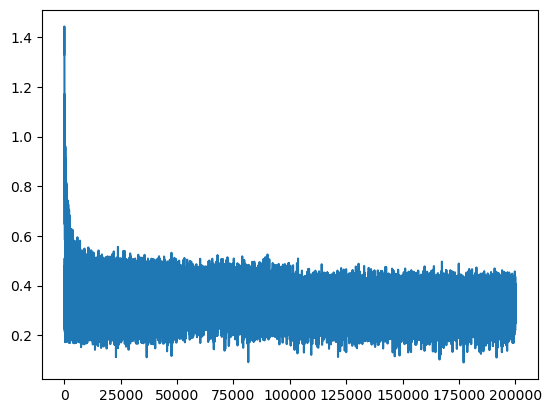

In [78]:
plt.plot(stepi, lossi)

In [79]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0899, grad_fn=<NllLossBackward0>)

In [80]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1353, grad_fn=<NllLossBackward0>)

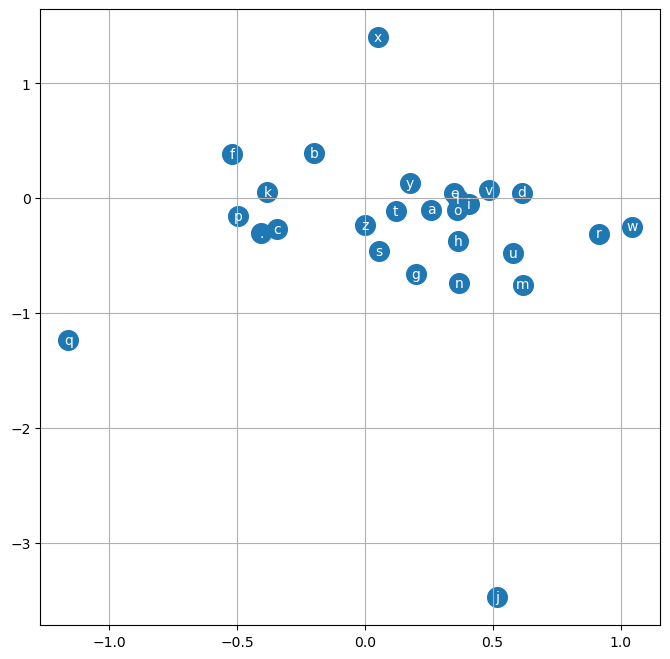

In [81]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1], itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [34]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [82]:
for _ in range(20):
	out = []
	context = [0]*block_size # initialize with all...
    
	while True:
		emb = C[torch.tensor([context])] # (1, block_size, d)
		h = torch.tanh(emb.view(1, -1) @ W1 + b1)
		logits = h @ W2 + b2
		probs = F.softmax(logits, dim=1)
		ix = torch.multinomial(probs, num_samples=1).item()
		context = context[1:] + [ix]
		out.append(ix)

		if ix == 0:
			break

	print(''.join(itos[i] for i in out))

ana.
kirah.
baorion.
nazebennola.
mckine.
sesaibushtylann.
emy.
jiyanna.
mackinse.
guddaran.
dekallie.
nechariah.
alakki.
ciebaistidro.
kriyona.
joniya.
jalil.
xen.
marshing.
aithen.
